載入套件

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

input data

In [2]:
path = r"C:\Users\Sheng\Documents\NTPU_Bachelor\Year_4\Y4_Sem_2\ShallowML\ClassData"
df = pd.read_excel(path + r'\Wine.xlsx')
df.head()
# assign the last column to a variable
y = df.iloc[:, -1].values
# take off the last column
df1 = df.iloc[:, 1:]
columns = df1.columns

# display 資料的樣本數量和變數數量
print("Number of samples: %d" % df1.shape[0])
print("Number of variables: %d" % df1.shape[1])

Number of samples: 178
Number of variables: 13


In [7]:
scaler = StandardScaler()  # create a StandardScaler object
X_std = scaler.fit_transform(df1)  # standardize the data
df_X_std = pd.DataFrame(X_std, columns=columns)

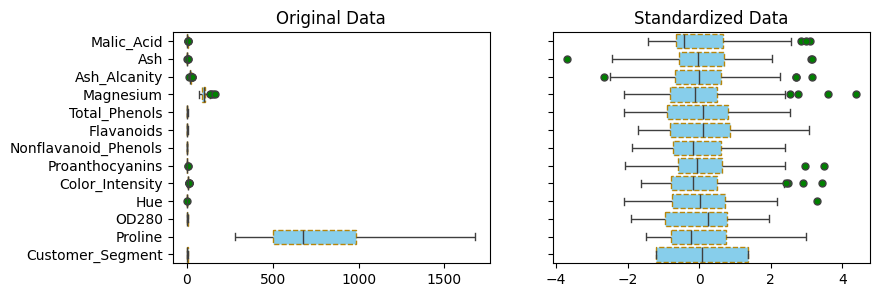

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(9, 3), sharey=True)
boxprops = dict(linestyle='--', linewidth=1, facecolor='skyblue', edgecolor='darkgoldenrod')
flierprops = dict(marker='o', markerfacecolor='g', markersize=5, linestyle='none')

sns.boxplot(data=df1, ax=ax[0], orient='h', boxprops=boxprops, flierprops=flierprops)
ax[0].set_title('Original Data')

sns.boxplot(data=df_X_std, ax=ax[1], orient='h', boxprops=boxprops, flierprops=flierprops)
ax[1].set_title('Standardized Data')

plt.show()

In [5]:
# PCA
pca = PCA()  # create a PCA object
X_pca = pca.fit(X_std)  # apply PCA to the standardized data
Z = pca.transform(X_std)  # get the new data matrix Z

eigenvalues = pca.explained_variance_
Z.shape

(178, 13)

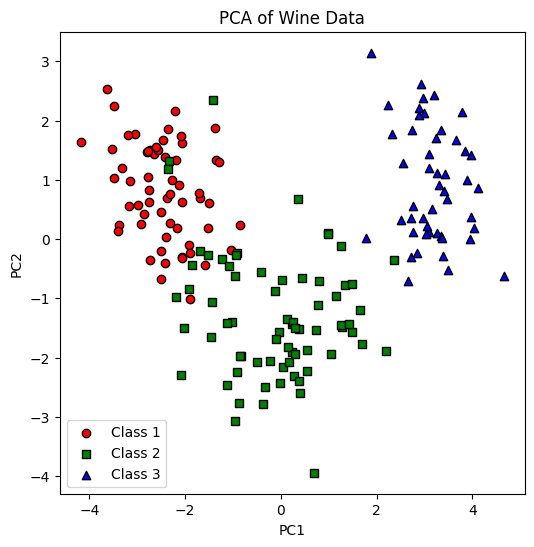

In [6]:
# draw the scatter plot of the first two PCs
plt.figure(figsize=(6, 6))
plt.scatter(Z[y == 1, 0], Z[y == 1, 1], c='r', label='Class 1', marker='o', edgecolors='k')
plt.scatter(Z[y == 2, 0], Z[y == 2, 1], c='g', label='Class 2', marker='s', edgecolors='k')
plt.scatter(Z[y == 3, 0], Z[y == 3, 1], c='b', label='Class 3', marker='^', edgecolors='k')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.title('PCA of Wine Data')
plt.show()